Jakov Rukavina

# Projekt

Implementacija članka "Implementation of Machine Learning Model to Predict Heart Failure Disease" u sklopu projekta na predmetu Uvod u znanost o podacima.

Članak je dostupan na linku: https://pdfs.semanticscholar.org/a74f/d8c51251e8c6126a1527e545bd78860a10f9.pdf


## Vrsta istraživanja u članku

Istraživanje možemo klasificirati prema:
 - svrsi: primijenjeno istraživanje - u članku se koriste već postojeće i dobro poznate metode kako bi se poboljšali rezultati prijašnjih istraživanja na ovu temu
 - dubini: istraživačko (exploratory) istraživanje - članak se fokusira na obradu javno dostupnih medicinskih podataka kako bi se objasnila veza između određenih značajki (koje opisuju stanje pacijenta) te zatajenja srca
 - vrsti korištenih podataka: kvantitativno istraživanje - većina podataka u korištenom skupu dobivena su medicinskim mjerenjima
 - stupnju manipulacije varijablama: promatračko istraživanje - varijable se ne mijenjaju već se koriste one koje su dobivene mjerenjem (promatranjem)
 - vrsti zaključka: induktivno istraživanje - znanje se generira zaključivanjem radi postizanja generalizacije
 - vremenu provedbe: studija presjeka - promatraju se trenutna stanja skupine pacijenata
 - izvoru informacija: sekundarno istraživanje - istraživači nisu sami prikupili podatke već su koristi javno dostupan skup
 - načinu prikupljanja podataka: laboratorijsko istraživanje - uspostavlja se odnos zatajenja bolesti srca i drugih značajki


## Importi biblioteka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

## Podaci

### Pregled podataka



Skup podataka korišten u članku sastoji se od 13 značajki i jedne oznake. Ukupno sadrži 303 opservacije odnosno očitanja stanja pacijenata te je dostupan na https://www.kaggle.com/ronitf/heart-disease-uci.

Orginalni skup podataka sadrži 76 značajki no iz njega su izbačeni razni podaci poput onih privatnih (ime pacijenta itd.). 

Opis značajki u skupu podataka:
    
 - age: The person’s age in years
 - sex: The person’s sex (1 = male, 0 = female)
 - cp: chest pain type
        — Value 0: asymptomatic
        — Value 1: atypical angina
        — Value 2: non-anginal pain
        — Value 3: typical angina
 - trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
 - chol: The person’s cholesterol measurement in mg/dl
 - fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
 - restecg: resting electrocardiographic results
        — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
        — Value 1: normal
        — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - thalach: The person’s maximum heart rate achieved
 - exang: Exercise induced angina (1 = yes; 0 = no)
 - oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
 - slope: the slope of the peak exercise ST segment
        — Value 0: downsloping
        — Value 1: flat
        — Value 2: upsloping
 - ca: The number of major vessels (0–3)
 - thal: A blood disorder called thalassemia
        — Value 0: NULL (dropped from the dataset previously
        — Value 1: fixed defect (no blood flow in some part of the heart)
        — Value 2: normal blood flow
        — Value 3: reversible defect (a blood flow is observed but it is not normal)
 - target: Heart disease (1 = yes, 0 = no)

Učitavanje .csv filea

In [2]:
file = 'data/heart_cleveland.csv'
# file = 'data/heart.csv'
df = pd.read_csv(file)


Prvi pregled podataka

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Pregled kategoričkih podataka.

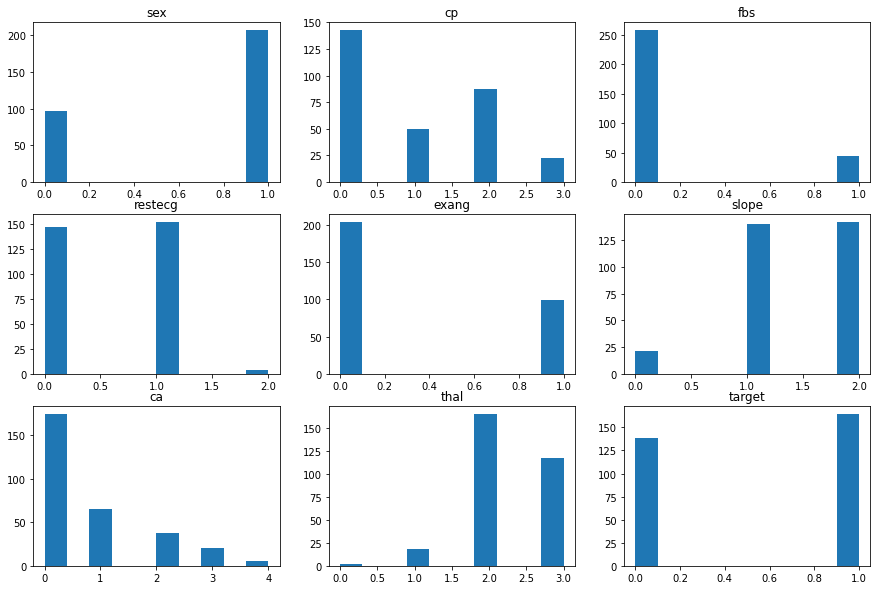

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

ax[0, 0].hist(df.sex)
ax[0, 0].title.set_text('sex')

ax[0, 1].hist(df.cp)
ax[0, 1].title.set_text('cp')

ax[0, 2].hist(df.fbs)
ax[0, 2].title.set_text('fbs')

ax[1, 0].hist(df.restecg)
ax[1, 0].title.set_text('restecg')

ax[1, 1].hist(df.exang)
ax[1, 1].title.set_text('exang')

ax[1, 2].hist(df.slope)
ax[1, 2].title.set_text('slope')

ax[2, 0].hist(df.ca)
ax[2, 0].title.set_text('ca')

ax[2, 1].hist(df.thal)
ax[2, 1].title.set_text('thal')

ax[2, 2].hist(df.target)
ax[2, 2].title.set_text('target')

plt.show()

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Outliers - stršeći podaci

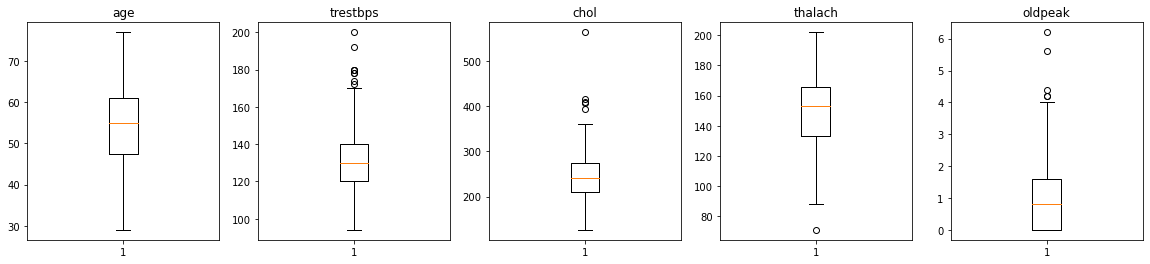

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(20,4))

ax[0].boxplot(df.age)
ax[0].title.set_text('age')

ax[1].boxplot(df.trestbps)
ax[1].title.set_text('trestbps')

ax[2].boxplot(df.chol)
ax[2].title.set_text('chol')

ax[3].boxplot(df.thalach)
ax[3].title.set_text('thalach')

ax[4].boxplot(df.oldpeak)
ax[4].title.set_text('oldpeak')

plt.show()

In [8]:
print(df.loc[df.oldpeak > 5]['oldpeak'].count())
print(df.loc[df.chol > 500]['chol'].count())


2
1


Izbacivanje stršećih podataka

In [9]:
print(len(df))

df = df.loc[df.chol <= 500]
df = df.loc[df.oldpeak <= 5]

print(len(df))

303
300


Izbacivanje duplikata

In [10]:
print(len(df))

df.drop_duplicates(inplace=True)

print(len(df))

300
299


### Važnost pojedinih značajki

<AxesSubplot:>

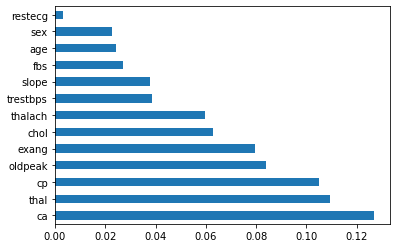

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.filter(regex='^(?!target$).*')
y = df['target']

kbest = SelectKBest(mutual_info_classif, k=13)
kbest.fit(X, y)

feat_importances = pd.Series(kbest.scores_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')


Vizualizacija utjecaja najbitnijih značajki na zatajenje srca.

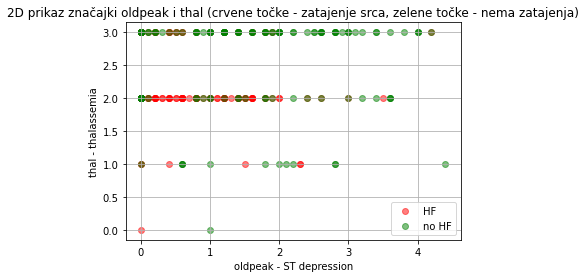

In [12]:
# mask
mask_hf = df.target == 1

# plot
plt.scatter(df.loc[mask_hf,'oldpeak'], df.loc[mask_hf,'thal'], alpha=0.5, c='r', label='HF')
plt.scatter(df.loc[~mask_hf,'oldpeak'], df.loc[~mask_hf,'thal'], alpha=0.5, c='g', label='no HF')
plt.xlabel('oldpeak - ST depression')
plt.ylabel('thal - thalassemia')
plt.title('2D prikaz značajki oldpeak i thal (crvene točke - zatajenje srca, zelene točke - nema zatajenja)')
plt.grid()
plt.legend(loc='best')
plt.show()

Još jedan par zanimljivih značajki

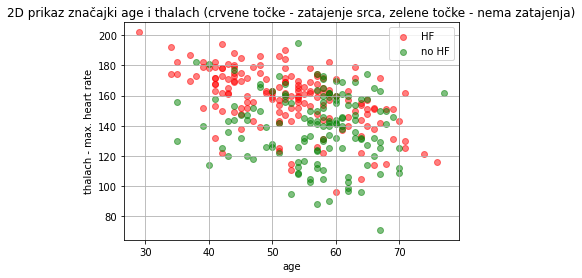

In [13]:
# mask
mask_hf = df.target == 1

# plot
plt.scatter(df.loc[mask_hf,'age'], df.loc[mask_hf,'thalach'], alpha=0.5, c='r', label='HF')
plt.scatter(df.loc[~mask_hf,'age'], df.loc[~mask_hf,'thalach'], alpha=0.5, c='g', label='no HF')
plt.xlabel('age')
plt.ylabel('thalach - max. heart rate')
plt.title('2D prikaz značajki age i thalach (crvene točke - zatajenje srca, zelene točke - nema zatajenja)')
plt.grid()
plt.legend(loc='best')
plt.show()

### Korelacija značajki

Iz grafa se vidi da nema značajki koje su u visokoj korelacije stoga ne treba izbacivati značajke po ovoj osnovi.

<AxesSubplot:>

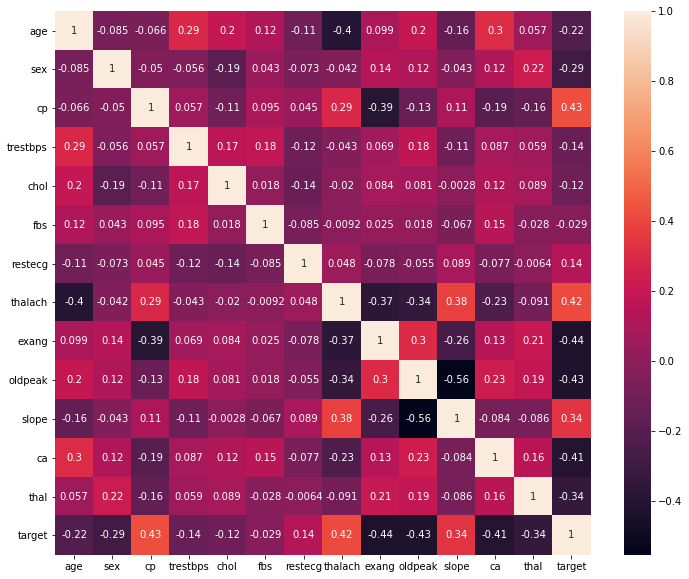

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Stvaranje sintetičkih podataka

In [15]:
#from sklearn.neighbors import KernelDensity
#kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(df)
#synthetic = pd.DataFrame(kde.sample(samples))


def synthesize_data(samples: int, exisitngData: pd.DataFrame):
    
    new = []
    
    for i in range(samples):
        
        original = exisitngData.iloc[random.randint(0, len(exisitngData) - 1)].copy()
        #print(original)
        original['age'] += random.gauss(mu=0.0, sigma=(original['age'] / 50))
        original['trestbps'] += random.gauss(mu=0.0, sigma=(original['trestbps'] / 50))
        original['chol'] += random.gauss(mu=0.0, sigma=(original['chol'] / 50))
        original['thalach'] += random.gauss(mu=0.0, sigma=(original['thalach'] / 50))
        original['oldpeak'] += random.gauss(mu=0.0, sigma=(original['oldpeak'] / 50))
        #print(original)
        new.append(original)
    
    new = pd.DataFrame(new)
    
    new.age = np.round(new.age).astype(int) 
    new.sex = np.round(new.sex).astype(int) 
    new.cp = np.round(new.cp).astype(int) 
    new.trestbps = np.round(new.trestbps).astype(int) 
    new.chol = np.round(new.chol).astype(int) 
    new.fbs = np.round(new.fbs).astype(int) 
    new.restecg = np.round(new.restecg).astype(int) 
    new.thalach = np.round(new.thalach).astype(int) 
    new.exang = np.round(new.exang).astype(int) 
    new.oldpeak = np.round(new.oldpeak, 1)
    new.slope = np.round(new.slope).astype(int) 
    new.ca = np.round(new.ca).astype(int) 
    new.thal = np.round(new.thal).astype(int) 
    new.target = np.round(new.target).astype(int) 
    
    #new.drop(columns=['Id'])
    return new

        
ndf = synthesize_data(700, df)
df = pd.merge(ndf, df, how='outer')


Ponovo izbacivanje duplikata za svaki slučaj

In [16]:
print(len(df))

df.drop_duplicates(inplace=True)

print(len(df))

999
999


### Pretvorba kategoričkih značajki u binarne

Kategorije značajki 'cp', 'restecg', 'slope' i 'thal' nemaju poredak pa ih pretvaramo u binarne uz one-hot encoding.

In [17]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


### Odvajanje i skaliranje podataka

In [18]:
X = df.filter(regex='^(?!target$).*')
y = df['target']

In [19]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,57,1,171,288,0,155,0,0.2,0,0,...,1,0,0,0,1,0,0,0,0,1
1,56,1,129,252,1,139,1,0.6,1,0,...,1,0,0,0,1,0,0,1,0,0
2,64,1,110,240,0,163,0,0.6,2,1,...,1,0,0,0,0,1,0,1,0,0
3,44,1,105,211,0,149,1,3.1,0,1,...,1,0,0,0,1,0,0,0,1,0
4,57,1,155,169,0,175,0,1.6,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,0,1,0,0,0,0,1
995,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
996,68,1,144,193,1,141,0,3.4,2,1,...,0,1,0,0,1,0,0,0,0,1
997,57,1,130,131,0,115,1,1.2,1,1,...,0,1,0,0,1,0,0,0,0,1


In [20]:
y = y.to_numpy()

Skaliranje i odvajanje na skup za treniranje i testiranje.

In [21]:
from sklearn import preprocessing, model_selection

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.291748,0.691238,2.257030,0.873767,-0.412055,0.225464,-0.680195,-0.732008,-0.720600,-0.944482,...,1.001002,-0.975280,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,-0.282843,-1.134038,1.332291
1,0.184001,0.691238,-0.136935,0.126462,2.426861,-0.486049,1.470167,-0.365775,0.264187,-0.944482,...,1.001002,-0.975280,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,3.535534,-1.134038,-0.750587
2,1.045978,0.691238,-1.219919,-0.122639,-0.412055,0.581220,-0.680195,-0.365775,1.248974,1.058782,...,1.001002,-0.975280,-0.114824,-0.248267,-0.957845,1.075950,-0.054882,3.535534,-1.134038,-0.750587
3,-1.108965,0.691238,-1.504915,-0.724634,-0.412055,-0.041354,1.470167,1.923182,-0.720600,1.058782,...,1.001002,-0.975280,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,-0.282843,0.881805,-0.750587
4,0.291748,0.691238,1.345043,-1.596490,-0.412055,1.114854,-0.680195,0.549808,-0.720600,-0.944482,...,-0.998999,1.025346,-0.114824,-0.248267,-0.957845,1.075950,-0.054882,-0.282843,0.881805,-0.750587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.291748,-1.446679,0.490056,-0.101881,-0.412055,-1.197562,1.470167,-0.732008,-0.720600,1.058782,...,-0.998999,1.025346,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,-0.282843,-1.134038,1.332291
995,-1.001218,0.691238,-1.219919,0.375564,-0.412055,-0.797336,-0.680195,0.183575,-0.720600,-0.944482,...,-0.998999,1.025346,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,-0.282843,-1.134038,1.332291
996,1.476966,0.691238,0.718053,-1.098287,2.426861,-0.397110,-0.680195,2.197856,1.248974,1.058782,...,-0.998999,1.025346,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,-0.282843,-1.134038,1.332291
997,0.291748,0.691238,-0.079936,-2.385311,-0.412055,-1.553318,1.470167,0.183575,0.264187,1.058782,...,-0.998999,1.025346,-0.114824,-0.248267,1.044011,-0.929412,-0.054882,-0.282843,-1.134038,1.332291


Selekcija značajki nije dala mjerljivo povećanje točnosti ili smanjenje vremena izvedbe pa taj kod ostaje zakomentiran.

In [22]:
#kbest = SelectKBest(mutual_info_classif, k=15)
#kbest.fit(X_train, y_train)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

#X_train_ = X_train[X_train.columns[kbest.get_support()]]
#X_test_ = X_test[X_test.columns[kbest.get_support()]]

## Učenje i predikcija

Funkcija za evaluaciju modela.

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def show_metrics(y_true, y_pred):
    print('Accuracy: {:.2f}%\n'.format(accuracy_score(y_true, y_pred) * 100))
    print(classification_report(y_true, y_pred))
    
    #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', ax=ax);
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');  
    ax.xaxis.set_ticklabels(['no HD', 'HD']);
    ax.yaxis.set_ticklabels(['no HD', 'HD']);
    

Funkcija za k-fold evaluaciju.

In [24]:
from sklearn.model_selection import KFold

def kfold_eval(model, X, y, k=10):
    
    kf = KFold(n_splits=k, shuffle=True)
 
    acc_score = []
 
    for train_index, test_index in kf.split(X):
        X_train , X_test = X[train_index], X[test_index]
        y_train , y_test = y[train_index], y[test_index]
     
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
     
        acc = accuracy_score(y_test, y_pred)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/k
 
    # print('accuracy of each fold - {}'.format(acc_score))
    print('{}-fold avg accuracy: {:.2f}%'.format(k, avg_acc_score * 100))

### Stabla odluke

10-fold avg accuracy: 96.20%
Accuracy: 96.00%

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       144
           1       0.95      0.97      0.96       156

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



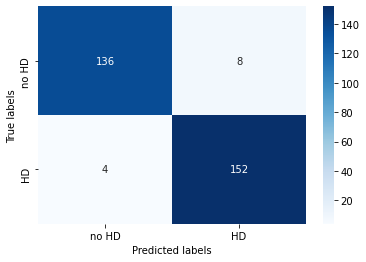

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

kfold_eval(tree_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Naivna Bayesova klasifikacija

10-fold avg accuracy: 83.38%
Accuracy: 85.33%

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       144
           1       0.85      0.87      0.86       156

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



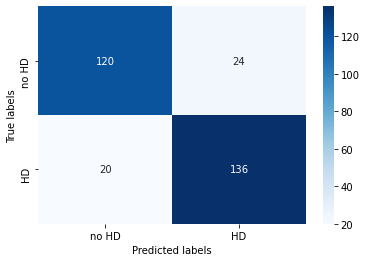

In [26]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

kfold_eval(nb_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Random Forest

10-fold avg accuracy: 98.50%
Accuracy: 97.33%

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       144
           1       0.96      0.99      0.97       156

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



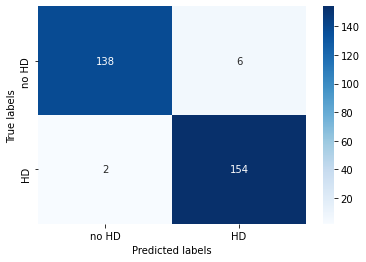

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

kfold_eval(rf_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Logistička regresija

10-fold avg accuracy: 85.89%
Accuracy: 84.00%

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       144
           1       0.81      0.90      0.85       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



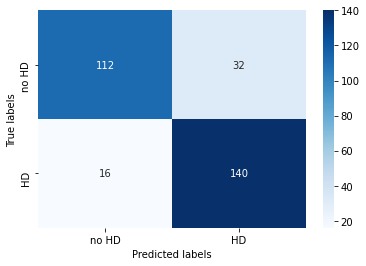

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

kfold_eval(lr_model, X_scaled, y)
show_metrics(y_test, y_pred)

### SVM

10-fold avg accuracy: 93.29%
Accuracy: 93.33%

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       144
           1       0.92      0.96      0.94       156

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



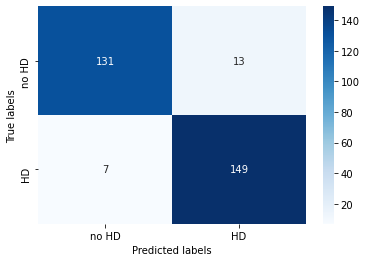

In [29]:
from sklearn.svm import SVC

svm_model = SVC(C=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

kfold_eval(svm_model, X_scaled, y)
show_metrics(y_test, y_pred)

SVM uz C=10 (konstantu koja utječe na regularizaciju; veća vrijednost -> manja regularizacija)

10-fold avg accuracy: 98.10%
Accuracy: 97.00%

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       144
           1       0.97      0.97      0.97       156

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



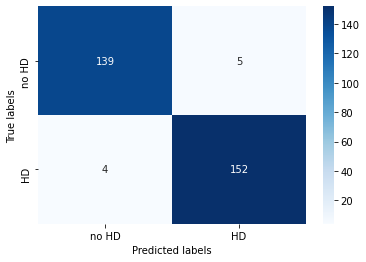

In [30]:
svm_model = SVC(C=10)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

kfold_eval(svm_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Zaključak

Rekreiranjem postupaka iz članka dobio sam slijedeće rezultate:
 - Stabla odluke -> dobivena točnost oko 96%, točnost iz članka 93.19%
 - Naivna Bayesova klasifikacija -> dobivena točnost oko 84%, točnost iz članka 87.27%
 - Random Forest -> dobivena točnost oko 98%, točnost iz članka 89.14%
 - Logistička regresija -> dobivena točnost oko 86.5%, točnost iz članka 87.36%
 - SVM (C=1) -> dobivena točnost oko 93%, točnost iz članka 92.30%
 - SVM (C=10) -> dobivena točnost oko 98%, točnost iz članka 92.30%

Razultati više-manje odgovaraju rezultatima iz članka osim u slučajevima sa Random Forest klasifikatorom i SVM klasifikatorom uz konstantu C=10 gdje u oba slučajeva dobivam poprilično veću točnost.

Sumnjam na to kako se točnost korištenih modela u članku pogrešno evaluirala ako je dataset podijeljen na train i test tek nakon stvaranja sintetičkih podataka. Ovo bi značilo da su podaci iz podskupa za testiranje također utjecali i na primjere iz podskupa za treniranje te to potencijalno objašnjava poprilično veću postignutu točnost u odnosu na prijašnje članke koji su koristili isti dataset.

Smatram kako bi rješenje ovoga problema bilo uključiti cijeli Heart Failure Prediction Dataset koji ukupno uključuje 918 primjera te odmah na početku podijeliti dataset na skup za učenje i skup za treniranje. Nakon te podjele mogu se SAMO od primjera za treniranje napraviti dodatni sintetički podaci kako oni ne bi "sličili" na testne primjere.